In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Posibles planteamiento ····Es cosa MIA

1. hacer las diferencias entre los años y otra de edades o gestacciones y lo que vea oportuno. 


1. Limpiar los datos

2. Identificar cuales son los patrones

In [41]:
aborto_ley_2010 = pd.read_csv('abortos-voluntarios-por-el-metodo-de-la-intervencion-ley-organica-22010-de-3-de-marzo.csv', sep=';')
aborto_ley_2010.head()

,Año,Concepto,Tipo territorio,Código territorio,Territorio,Valor,Unidad,Estado dato
0,2011,Abortos voluntarios de mujeres residentes real...,Otros,NaN,NaN,3728,Número,NaN
1,2011,Abortos voluntarios de mujeres residentes real...,Otros,NaN,NaN,424,Número,NaN
2,2011,Abortos voluntarios de mujeres residentes real...,Otros,NaN,NaN,16231,Número,NaN
3,2011,Abortos voluntarios de mujeres residentes real...,Otros,NaN,NaN,304,Número,NaN
4,2011,Abortos voluntarios de mujeres residentes real...,Otros,NaN,NaN,76,Número,NaN


In [ ]:
#aborto_ley_2010 = aborto_ley_2010.drop(columns=['Tipo territorio', 'Código territorio', "Territorio", "Unidad", "Estado dato"])

In [42]:
aborto_ley_2010["Concepto"].unique()

array(['Abortos voluntarios de mujeres residentes realizados por el método de dilatación y evacuación',
       'Abortos voluntarios de mujeres residentes realizados por el método de mifepristona',
       'Abortos voluntarios de mujeres residentes realizados por el método de dilatación y aspiración',
       'Abortos voluntarios de mujeres residentes realizados por el método de prostaglandinas',
       'Abortos voluntarios de mujeres residentes realizados por otros métodos / no consta'],
      dtype=object)

In [ ]:
aborto_ley_2010["Concepto"] = (aborto_ley_2010['Concepto']
.str.replace('Abortos voluntarios de mujeres residentes realizados por el método de ', '', regex=False)
.str.replace('Abortos voluntarios de mujeres residentes realizados por ', '', regex=False)
.str.replace(' / ', ' ', regex=False)
.str.strip()
)
aborto_ley_2010.head()


,Año,Concepto,Valor
0,2011,dilatación y evacuación,3728
1,2011,mifepristona,424
2,2011,dilatación y aspiración,16231
3,2011,prostaglandinas,304
4,2011,otros métodos no consta,76


Limpieza de tabla de **"Abortos voluntarios por grupo de edad"**

In [55]:
aborto_grupo_edad = pd.read_csv('abortos-voluntarios-por-grupos-de-edad.csv', sep=';')
aborto_grupo_edad.head()

,Año,Concepto,Tipo territorio,Código territorio,Territorio,Valor,Unidad,Estado dato
0,1986,Abortos voluntarios de mujeres residentes entr...,Otros,NaN,NaN,-,Número,NaN
1,1986,Abortos voluntarios de mujeres residentes de 4...,Otros,NaN,NaN,-,Número,NaN
2,1986,Abortos voluntarios de mujeres residentes entr...,Otros,NaN,NaN,-,Número,NaN
3,1986,Abortos voluntarios de mujeres residentes meno...,Otros,NaN,NaN,-,Número,NaN
4,1986,Total abortos voluntarios de mujeres residentes,Otros,NaN,NaN,148,Número,NaN


In [ ]:
aborto_grupo_edad["Concepto"].unique()

aborto_grupo_edad["Concepto"] = (aborto_grupo_edad['Concepto']
.str.replace('Abortos voluntarios de mujeres residentes entre ', '', regex=False)
.str.replace('Abortos voluntarios de mujeres residentes de ', '', regex=False)
.str.replace('Abortos voluntarios de mujeres residentes ', '', regex=False)
.str.replace(' / ', ' ', regex=False)
.str.strip()
)


,Año,Concepto,Valor
0,1986,20 y 24años,NaN
1,1986,44 años y más,NaN
2,1986,40 y 44 años,NaN
3,1986,menores de 15 años,NaN
4,1986,Total abortos voluntarios de mujeres residentes,148


In [95]:

aborto_grupo_edad.tail()


,Año,Concepto,Valor
346,2024,Total abortos voluntarios de mujeres residentes,18149
347,2024,15 y 19 años,1759
348,2024,30 y 34 años,3575
349,2024,44 años y más,125
350,2024,40 y 44 años,1294


In [94]:
#aborto_grupo_edad = aborto_grupo_edad.drop(columns=['Tipo territorio', 'Código territorio', "Territorio", "Unidad", "Estado dato"])
conceptos = [
    'Abortos voluntarios de mujeres residentes entre 20 y 24años',
    'Abortos voluntarios de mujeres residentes de 44 años y más',
    'Abortos voluntarios de mujeres residentes entre 40 y 44 años',
    'Abortos voluntarios de mujeres residentes menores de 15 años',
    'Total abortos voluntarios de mujeres residentes',
    'Abortos voluntarios de mujeres residentes entre 30 y 34 años',
    'Abortos voluntarios de mujeres residentes entre 25 y 29 años',
    'Abortos voluntarios de mujeres residentes entre 35 y 39 años',
    'Abortos voluntarios de mujeres residentes entre 15 y 19 años'
]

filtro_total = aborto_grupo_edad[
    aborto_grupo_edad["Concepto"] == "Total abortos voluntarios de mujeres residentes"
]
filtro_total_por_año = (
    filtro_total
        .groupby("Año")["Valor"]
        .count()
)
filtro_total_por_año


Año
1986    1
1987    1
1988    1
1989    1
1990    1
1991    1
1992    1
1993    1
1994    1
1995    1
1996    1
1997    1
1998    1
1999    1
2000    1
2001    1
2002    1
2003    1
2004    1
2005    1
2006    1
2007    1
2008    1
2009    1
2010    1
2011    1
2012    1
2013    1
2014    1
2015    1
2016    1
2017    1
2018    1
2019    1
2020    1
2021    1
2022    1
2023    1
2024    1
Name: Valor, dtype: int64

In [91]:
conceptos["Total abortos voluntarios de mujeres residentes"].value_counts()

TypeError: list indices must be integers or slices, not str

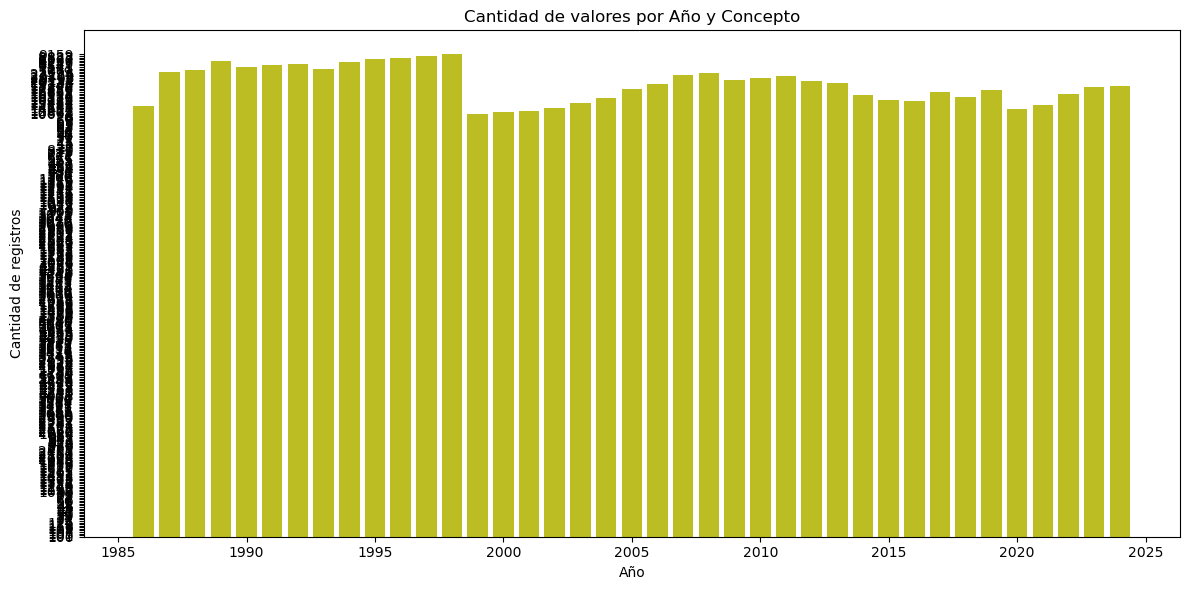

In [88]:
plt.figure(figsize=(12, 6))
for concepto, data in conteos.groupby("Concepto"):
    plt.bar(data["Año"], data["Valor"], label=concepto)

plt.xlabel("Año")
plt.ylabel("Cantidad de registros")
plt.title("Cantidad de valores por Año y Concepto")
#plt.legend()
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
aborto_grupo_edad["Valor"] = aborto_grupo_edad["Valor"].replace("-", np.nan)
aborto_grupo_edad["Valor"].unique()

array([nan, '148', '5379', '941', '7063', '936', '1592', '1886', '1310',
       '360', '27', '11', '52', '470', '1085', '1479', '8238', '1796',
       '2204', '1137', '15', '40', '7541', '2064', '1729', '978', '913',
       '446', '7', '1364', '1782', '34', '839', '1380', '2157', '8',
       '399', '7571', '972', '1469', '2267', '434', '1877', '943', '35',
       '17', '1105', '8147', '1283', '903', '376', '32', '7131', '10',
       '773', '2020', '1734', '8223', '431', '2034', '1498', '2178',
       '963', '1076', '8360', '1142', '12', '1964', '1583', '919', '464',
       '2241', '525', '1196', '1688', '2126', '39', '2362', '880', '8827',
       '1702', '2172', '1188', '924', '2357', '8883', '487', '41', '2480',
       '1746', '9159', '1233', '492', '56', '2161', '984', '10694',
       '1086', '551', '14', '1393', '1970', '2639', '2989', '2698',
       '3088', '1317', '2067', '44', '1149', '10862', '3596', '1533',
       '1244', '42', '12611', '21', '2411', '3243', '521', '3984', '150

In [57]:
aborto_motivo_interrupcion = pd.read_csv('abortos-voluntarios-por-motivo-de-la-interrupcion.csv', sep=';')
aborto_motivo_interrupcion.head()

,Año,Concepto,Tipo territorio,Código territorio,Territorio,Valor,Unidad,Estado dato
0,1986,Abortos voluntarios de mujeres residentes por ...,Otros,NaN,NaN,1,Número,NaN
1,1986,Abortos voluntarios de mujeres residentes por ...,Otros,NaN,NaN,-,Número,NaN
2,1986,Abortos voluntarios de mujeres residentes por ...,Otros,NaN,NaN,-,Número,NaN
3,1986,Abortos voluntarios de mujeres residentes por ...,Otros,NaN,NaN,137,Número,NaN
4,1986,Abortos voluntarios de mujeres residentes de a...,Otros,NaN,NaN,-,Número,NaN


In [58]:
aborto_motivo_interrupcion["Valor"].unique()

array(['1', '-', '137', '8', '4', '14', '22', '5264', '75', '85', '43',
       '0', '6927', '36', '3', '117', '8078', '11', '143', '7378', '23',
       '2', '7404', '140', '8035', '6', '106', '5', '7035', '21', '8093',
       '104', '8202', '9', '37', '109', '129', '8673', '18', '8752',
       '107', '8971', '13', '30', '145', '168', '10485', '32', '7', '19',
       '10607', '208', '39', '194', '12351', '27', '12', '311', '14340',
       '24', '66', '15072', '293', '15872', '89', '264', '16973', '350',
       '345', '47', '18848', '383', '21663', '68', '50', '402', '21673',
       '407', '17', '19766', '10356', '9026', '589', '228', '291', '502',
       '1351', '18811', '29', '18109', '1491', '504', '26', '16737',
       '2453', '507', '13990', '1963', '558', '1896', '599', '13621',
       '525', '13583', '1847', '552', '1740', '14343', '1574', '14214',
       '1757', '14574', '499', '12155', '443', '1638', '12919', '470',
       '1785', '42', '464', '1978', '14108', '889', '471', '164